## Cats vs Dogs Model
This is a minimal example showing how to train a fastai model on Kaggle, and save it so you can use it in your app.

### Fetch the data
Fetch the data and and load it as a `ImageDataLoader()`

In [3]:
from fastai.vision.all import *

In [4]:
path = untar_data(URLs.PETS)/'images'

We need a way to label our images as dogs or cats. In this dataset, pictures of cats are given a filename that starts with a capital letter:

In [5]:
def is_cat(x): return x[0].isupper()

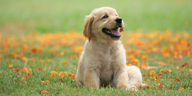

In [33]:
im = Image.open('/kaggle/input/dogpictures/dog.jpeg')
im.to_thumb(192, 192)

Now we can create our DataLoaders and train our model, a resnet18 (to keep it small and fast):

In [6]:
dls = ImageDataLoaders.from_name_func(
    '.',
    get_image_files(path),
    valid_pct = 0.2,
    seed = 42,
    label_func = is_cat,
    item_tfms = Resize(192)
)

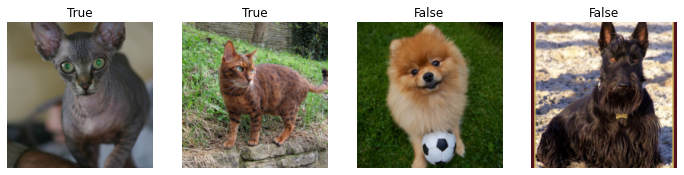

In [12]:
dls.valid.show_batch(max_n=4, nrows=1)

## Train Model
We train and finetune over a `resnet18` pre-trained model.

In [7]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.185720,0.050598,0.016238,01:24


epoch,train_loss,valid_loss,error_rate,time
0,0.066181,0.045123,0.011502,01:13
1,0.058855,0.024040,0.009472,01:13
2,0.023218,0.019877,0.007442,01:14


We next observe the the confusion matrix and top losses the learnt model makes on data instances: 

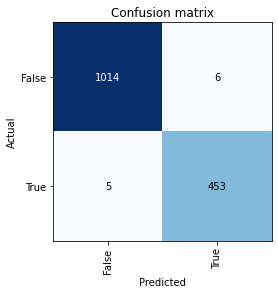

In [13]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

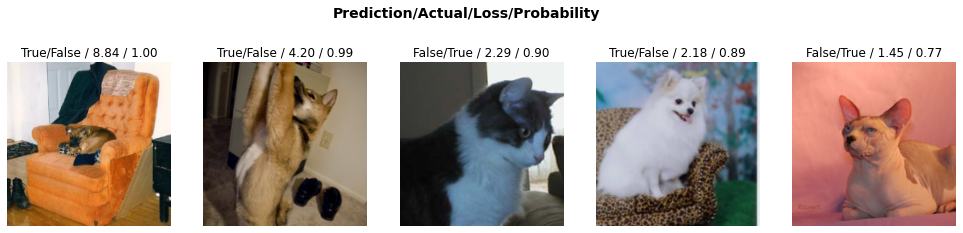

In [14]:
interp.plot_top_losses(5, nrows=1, figsize=(17, 4))

### Clean Data

In [18]:
from fastai.vision.widgets import *

In [19]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [21]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx, cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

### Export Trained Model
Now we can export our trained Learner. This contains all the information needed to run the model:

In [23]:
learn.export('model.pkl')